# Analysis

In [1]:
from sympy import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
init_printing()

In [2]:
def nullstellen2d(f):
    glg = Eq(f)
    Lsg = solve(glg)
    return Lsg

def nullstellenpunkte2d(f):
    Lsg = nullstellen2d(f)
    output = []
    for lsg in Lsg:
        output.append((lsg,0))
    return output

In [3]:
def plot2d(f, a, b):
    plt.figure()
    plt.grid()
    fn = lambdify(x, f, 'numpy')
    xn = np.linspace(a,b,100)
    plt.plot(xn, fn(xn))

In [4]:
def hochpunkte2d(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    glg = Eq(f1)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    for cand in candidates:
        if(f2.subs(x,cand) < 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f2.subs(x,cand) == 0):
            wert = f.subs(x,cand)
            if(f.subs(x, cand - epsilon) < wert and f.subs(x, cand + epsilon) < wert):
                lsg.append((cand, wert))
    return lsg

In [5]:
def tiefpunkte2d(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    glg = Eq(f1)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    for cand in candidates:
        if(f2.subs(x,cand) > 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f2.subs(x,cand) == 0):
            wert = f.subs(x,cand)
            if(f.subs(x, cand - epsilon) > wert and f.subs(x, cand + epsilon) > wert):
                lsg.append((cand, wert))
    return lsg

In [6]:
def wendepunkte2d(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    f3 = f2.diff(x)
    glg = Eq(f2)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    for cand in candidates:
        if(not f3.subs(x,cand) == 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f3.subs(x,cand) == 0):
            wert = f1.subs(x,cand)
            cond1 = f1.subs(x, cand - epsilon) > wert and f1.subs(x, cand + epsilon) > wert
            cond2 = f1.subs(x, cand - epsilon) < wert and f1.subs(x, cand + epsilon) < wert
            if(cond1 or cond2):
                lsg.append((cand, wert))
    return lsg

In [7]:
def plotHochpunkte2d(f, a, b):
    plot2d(f, a, b)
    plotHochpunkte2d_seperat(f, a, b)
    
def plotHochpunkte2d_seperat(f, a, b):
    hochpkt = np.array(hochpunkte2d(f))
    a = np.minimum(np.min(hochpkt[:, 0]), a)
    b = np.maximum(np.max(hochpkt[:, 0]), b)
    plt.plot(hochpkt[:, 0], hochpkt[:, 1], ".g", label = 'Hochpunkt')
    plt.legend()
    
def plotTiefpunkte2d(f, a, b):
    plot2d(f, a, b)
    plotTiefpunkte2d_seperat(f, a, b)
    
def plotTiefpunkte2d_seperat(f, a, b):
    tiefpkt = np.array(tiefpunkte2d(f))
    a = np.minimum(np.min(tiefpkt[:, 0]), a)
    b = np.maximum(np.max(tiefpkt[:, 0]), b)
    plt.plot(tiefpkt[:, 0], tiefpkt[:, 1], ".r", label = 'Tiefpunkt')
    plt.legend()
    
    
def plotExtrempunkte2d(f, a, b):
    plot2d(f, a, b)
    plotHochpunkte2d_seperat(f, a, b)
    plotTiefpunkte2d_seperat(f, a, b)
    
def plotWendepunkte2d(f, a, b):
    wendepkt = np.array(wendepunkte2d(f))
    a = np.minimum(np.min(wendepkt[:, 0]), a)
    b = np.maximum(np.max(wendepkt[:, 0]), b)
    plot2d(f, a, b)
    plt.plot(wendepkt[:, 0], wendepkt[:, 1], ".k", label = 'Wendepunkt')
    plt.legend()
    
def plotNullstellen2d(f, a, b):
    nst = np.array(nullstellenpunkte2d(f))
    a = np.minimum(np.min(nst[:, 0]), a)
    b = np.maximum(np.max(nst[:, 0]), b)
    plot2d(f, a, b)
    plt.plot(nst[:, 0], nst[:, 1], ".r", label = 'Nullstelle')
    plt.legend()

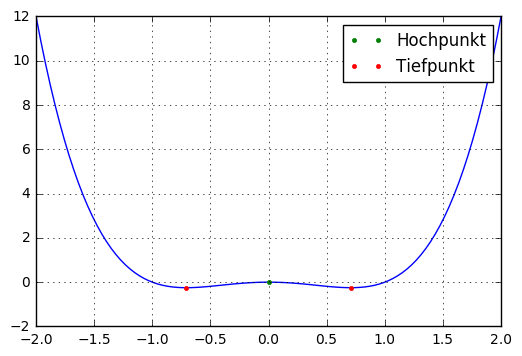

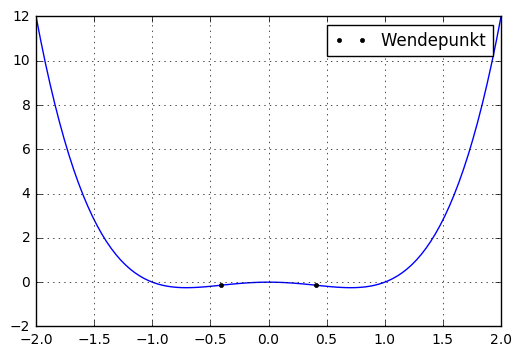

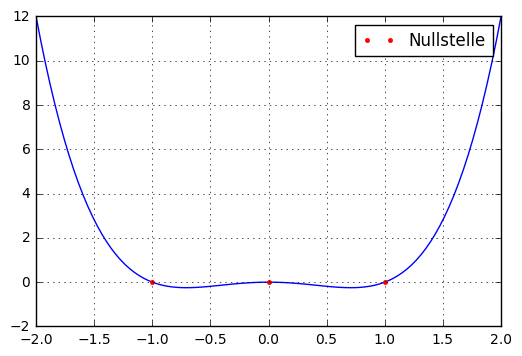

In [8]:
x = Symbol('x')
a = Symbol('a')
f = x**4-x**2
plotExtrempunkte2d(f, -2, 2)
plotWendepunkte2d(f, -2, 2)
plotNullstellen2d(f, -2, 2)

In [9]:
def jacobianMatrix(f, var):
    M = Matrix([f])
    return M.jacobian(var)


In [10]:
def gradient(f, var):
    if(Matrix([f]).shape[0] > 1 and Matrix([f]).shape[1] > 1):
        raise(Exception("Gradient nicht zu bestimmen"))
    return jacobianMatrix(f,var).T

In [11]:
#Hesse Matrix direkt zu bestimmen durch Sympy
#Jordan Zerlegung durch Sympy direkt zu bestimmen
#partielle Ableitungen sind die Eintraege der Jacobi Matrix
#Ableitung direkt zu bestimmen
#Riemann-Integral direkt zu bestimmen
#Grenzwerte von Folgen und Reihen direkt zu bestimmen
#Taylor Polynom direkt zu bestimmen

In [12]:
def plot3d(f, xintervall, yintervall):
    fig = plt.figure()
    fn = lambdify((x,y), f, 'numpy')
    xn = np.linspace(xintervall[0], xintervall[1], 50)
    yn = np.linspace(yintervall[0], yintervall[1], 50)
    X,Y = np.meshgrid(xn,yn)
    Z = fn(X,Y)
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap = plt.cm.viridis)

In [13]:
y = Symbol('y')

def hochpunkte3d(f, var):
    f1 = gradient(f, var)
    f2 = simplify(hessian(f, var))
    gls = set(f1)
    candidates = solve(gls)
    lsg = []
    for cand in candidates:
        definitheit = negativDefinit(f2.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]]))
        if(definitheit):
            lsg.append((cand[var[0]], cand[var[1]], f.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]])))
    return lsg

def tiefpunkte3d(f, var):
    f1 = gradient(f, var)
    f2 = simplify(hessian(f, var))
    gls = set(f1)
    candidates = solve(gls)
    lsg = []
    for cand in candidates:
        definitheit = positivDefinit(f2.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]]))
        if(definitheit):
            lsg.append((cand[var[0]], cand[var[1]], f.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]])))
    return lsg

def sattelpunkte3d(f, var):
    f1 = gradient(f, var)
    f2 = simplify(hessian(f, var))
    gls = set(f1)
    candidates = solve(gls)
    lsg = []
    for cand in candidates:
        definitheit = indefinit(f2.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]]))
        if(definitheit):
            lsg.append((cand[var[0]], cand[var[1]], f.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]])))
    return lsg

In [14]:
def positivDefinit(M):
    eigenwerte = M.eigenvals()
    result = True
    for eig in eigenwerte:
        if(eig <= 0):
            result = False
            break
    return result

def negativDefinit(M):
    eigenwerte = M.eigenvals()
    result = True
    for eig in eigenwerte:
        if(eig >= 0):
            result = False
            break
    return result

def indefinit(M):
    eigenwerte = list(M.eigenvals().keys())
    if(np.min(eigenwerte) < 0 and np.max(eigenwerte) > 0):
        return True
    return False

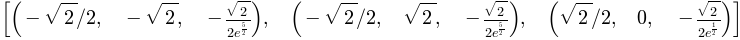

In [15]:
y = Symbol('y')
f = x*(y**2 - 1)*exp(-x**2-y**2)
tiefpunkte3d(f, [x,y])

In [16]:
def plotHochpunkte3d(f, a, b, var):
    plot3d(f, a, b)
    plotHochpunkte3d_seperat(f, a, b, var)

    
def plotHochpunkte3d_seperat(f, a, b, var):
    hochpkt = np.array(hochpunkte3d(f, var))
    plt.plot(hochpkt[:, 0], hochpkt[:, 1], hochpkt[:, 2], ".r", label = 'Hochpunkt')
    plt.grid()
    plt.legend()
    
def plotTiefpunkte3d(f, a, b, var):
    plot3d(f, a, b)
    plotTiefpunkte3d_seperat(f, a, b, var)

    
def plotTiefpunkte3d_seperat(f, a, b, var):
    tiefpkt = np.array(tiefpunkte3d(f, var))
    plt.plot(tiefpkt[:, 0], tiefpkt[:, 1], tiefpkt[:, 2], ".y", label = 'Tiefpunkt')
    plt.grid()
    plt.legend()
    
def plotSattelpunkte3d(f, a, b, var):
    sattelpkt = np.array(sattelpunkte3d(f, var))
    plot3d(f, a, b)
    plt.plot(sattelpkt[:, 0], sattelpkt[:, 1], sattelpkt[:, 2], ".b", label = 'Sattelpunkt')
    plt.grid()
    plt.legend()
    
def plotExtrempunkte3d(f, a, b, var):
    plot3d(f, a, b)
    plotTiefpunkte3d_seperat(f, a, b, var)
    plotHochpunkte3d_seperat(f, a, b, var)
    

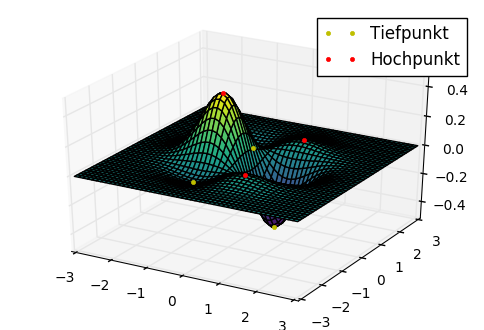

In [17]:
plotExtrempunkte3d(f, [-3, 3], [-3, 3], [x,y])

In [70]:
def solveDgl(ordnung, glg):
    y = Function('y')
    dgl = Eq(y(x).diff(x,ordnung), glg)
    return dsolve(dgl)

def solveDglAWA(ordnung, glg, x0, y0):
    Lsg = solveDgl(ordnung, glg)
    result = []
    if(type(Lsg) is Equality):
        Lsg = [Lsg]
    for lsg in Lsg:
        coeff = Eq(lsg.rhs.subs(x, x0), y0)
        lsgCoeff = solve(coeff)
        for c in lsgCoeff:
            if(type(c) is dict):
                result.append(lsg.subs(c).simplify())
            else:
                C1 = Symbol('C1')
                result.append(lsg.subs(C1,c).simplify())
    return set(result)

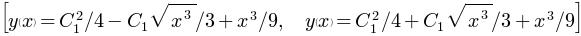

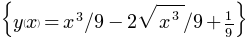

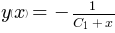

In [77]:
display(solveDgl(1, sqrt(x*y(x))))
display(solveDglAWA(1, sqrt(x*y(x)), 1, 0))
display(solveDglAWA(1, exp(x), 1, 0))
display(solveDglAWA(2, exp(x) + sin(x), 0, 1))
solveDgl(1, y(x)**2)

# Lineare Algebra

In [20]:
def solveGlg(glgs, lsg):
    i = 0
    gls = []
    for i in range(len(glgs)):
        gls.append(Eq(glgs[i], lsg[i]))
    gls = set(gls)
    Lsg = solve(gls)
    return Lsg

def solveGlgMatrix(M, b):
    y = Matrix([Symbol('y_' + str(j+1)) for j in range(M.shape[1])])
    return solve(Eq(M*y, b))

def lineare_unabhaengigkeit(vektoren):
    if(len(vektoren) > len(vektoren[0])):
        return False
    matrices = []
    for vect in vektoren:
        matrices.append(vect.T)
    M = Matrix(matrices).T
    y = Matrix([Symbol('y_' + str(j+1)) for j in range(M.shape[1])])
    b = Matrix([0 for j in range(M.shape[0])])
    Lsg = solve(Eq(M*y, b))
    result = True
    if(len(Lsg[0]) < len(y)):
        return False
    for component in y:
        if(Lsg[0][component] != 0):
            result = False
    return result

True

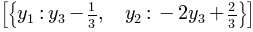

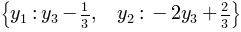

In [21]:
M = Matrix([[1,2,3],[4,5,6],[7,8,9]])
b = Matrix([1,2,3])
display(lineare_unabhaengigkeit([Matrix([1,0,0]), Matrix([0, 1, 0]), Matrix([0,0,1])]))
display(solveGlgMatrix(M,b))
y = Matrix([Symbol('y_' + str(j+1)) for j in range(M.shape[1])])
display(solveGlg(list(M*y),b))

In [22]:
#Matrix, Vektorrechnung, Normen, Skalarprodukt direkt anwendbar
#Determinante und Rang der Matrix direkt anwendbar (ohne Parameter)

In [23]:
def angle(v1, v2):
    return acos((v2.T * v1).det()/(v1.norm(2) * v2.norm(2)))*360/(2*pi)

In [24]:
angle(Matrix([1,0,0]), Matrix([1, 1, 0]))

In [25]:
def GramSchmidt(vektoren):
    vects = []
    for vect in vektoren:
        vects.append(vect.T)
    M = Matrix(vects).T
    Q,R = M.QRdecomposition()
    result = []
    for j in range(Q.shape[0]):
        result.append(Q[:,j])
    return result

In [26]:
M = [Matrix([3,4,7]), Matrix([2,5,8]), Matrix([3,6,9])]
GramSchmidt(M)

⎡⎡3⋅√74⎤  ⎡-49⋅√2923 ⎤  ⎡ 3⋅√158 ⎤⎤
⎢⎢─────⎥, ⎢──────────⎥, ⎢ ────── ⎥⎥
⎢⎢  74 ⎥  ⎢   2923   ⎥  ⎢  158   ⎥⎥
⎢⎢     ⎥  ⎢          ⎥  ⎢        ⎥⎥
⎢⎢2⋅√74⎥  ⎢ 21⋅√2923 ⎥  ⎢ 5⋅√158 ⎥⎥
⎢⎢─────⎥  ⎢ ──────── ⎥  ⎢ ────── ⎥⎥
⎢⎢  37 ⎥  ⎢   2923   ⎥  ⎢   79   ⎥⎥
⎢⎢     ⎥  ⎢          ⎥  ⎢        ⎥⎥
⎢⎢7⋅√74⎥  ⎢ 9⋅√2923  ⎥  ⎢-7⋅√158 ⎥⎥
⎢⎢─────⎥  ⎢ ───────  ⎥  ⎢────────⎥⎥
⎣⎣  74 ⎦  ⎣   2923   ⎦  ⎣  158   ⎦⎦